In [ ]:
%pip install -q pandas -q matplotlib -q seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
analise_modelos_df = pd.read_parquet('resultados_modelos.parquet')

if 'modelo_estrategia' not in analise_modelos_df.columns:
    analise_modelos_df['modelo_estrategia'] = analise_modelos_df['modelo'] + ' - ' + analise_modelos_df['estrategia']

In [8]:
analise_modelos_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   modelo             24 non-null     object 
 1   estrategia         24 non-null     object 
 2   tempo_treinamento  24 non-null     float64
 3   n_estimators       24 non-null     int64  
 4   min_samples_split  8 non-null      float64
 5   min_samples_leaf   8 non-null      float64
 6   max_depth          24 non-null     int64  
 7   Acurácia           24 non-null     float64
 8   Precisão           24 non-null     float64
 9   Recall             24 non-null     float64
 10  F1-Score           24 non-null     float64
 11  AUC-ROC            24 non-null     float64
 12  Precisão_Classe_0  24 non-null     float64
 13  Recall_Classe_0    24 non-null     float64
 14  F1-Score_Classe_0  24 non-null     float64
 15  Precisão_Classe_1  24 non-null     float64
 16  Recall_Classe_1    24 non-nu

In [9]:
def criar_grafico_barras(data, y, title, ylabel, figsize=(20, 10), rotation=90):
    plt.figure(figsize=figsize)
    sns.barplot(x='modelo_estrategia', y=y, data=data)
    plt.title(title)
    plt.xlabel('Modelo - Estratégia')
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()


def criar_grafico_barras_lado_a_lado(data, y1, y2, title, ylabel, figsize=(20, 10), rotation=90):
    plt.figure(figsize=figsize)
    x = range(len(data))
    width = 0.35
    
    plt.bar(x, data[y1], width, label='Classe 0', alpha=0.8)
    plt.bar([i + width for i in x], data[y2], width, label='Classe 1', alpha=0.8)
    
    plt.xlabel('Modelo - Estratégia')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks([i + width/2 for i in x], data['modelo_estrategia'], rotation=rotation)
    plt.legend()
    plt.tight_layout()
    plt.show()

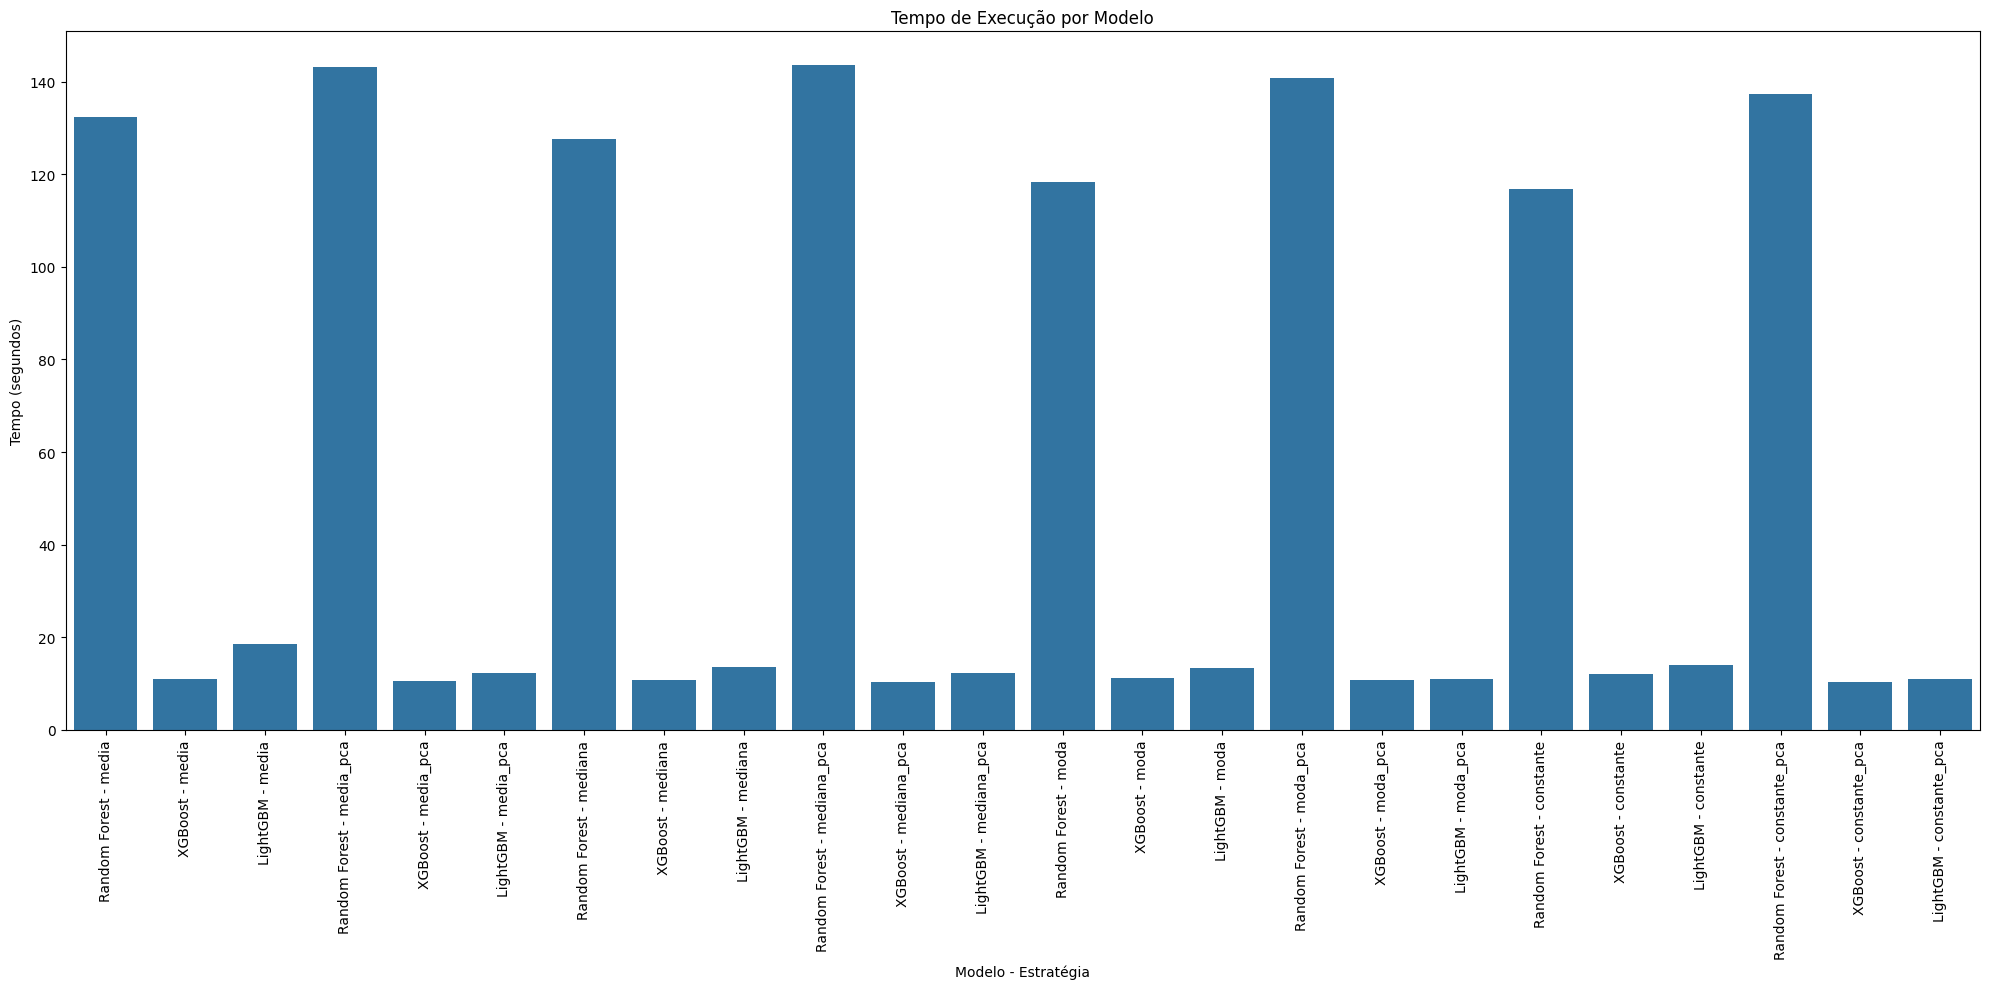

In [10]:
criar_grafico_barras(analise_modelos_df, 'tempo_treinamento', 'Tempo de Execução por Modelo', 'Tempo (segundos)')

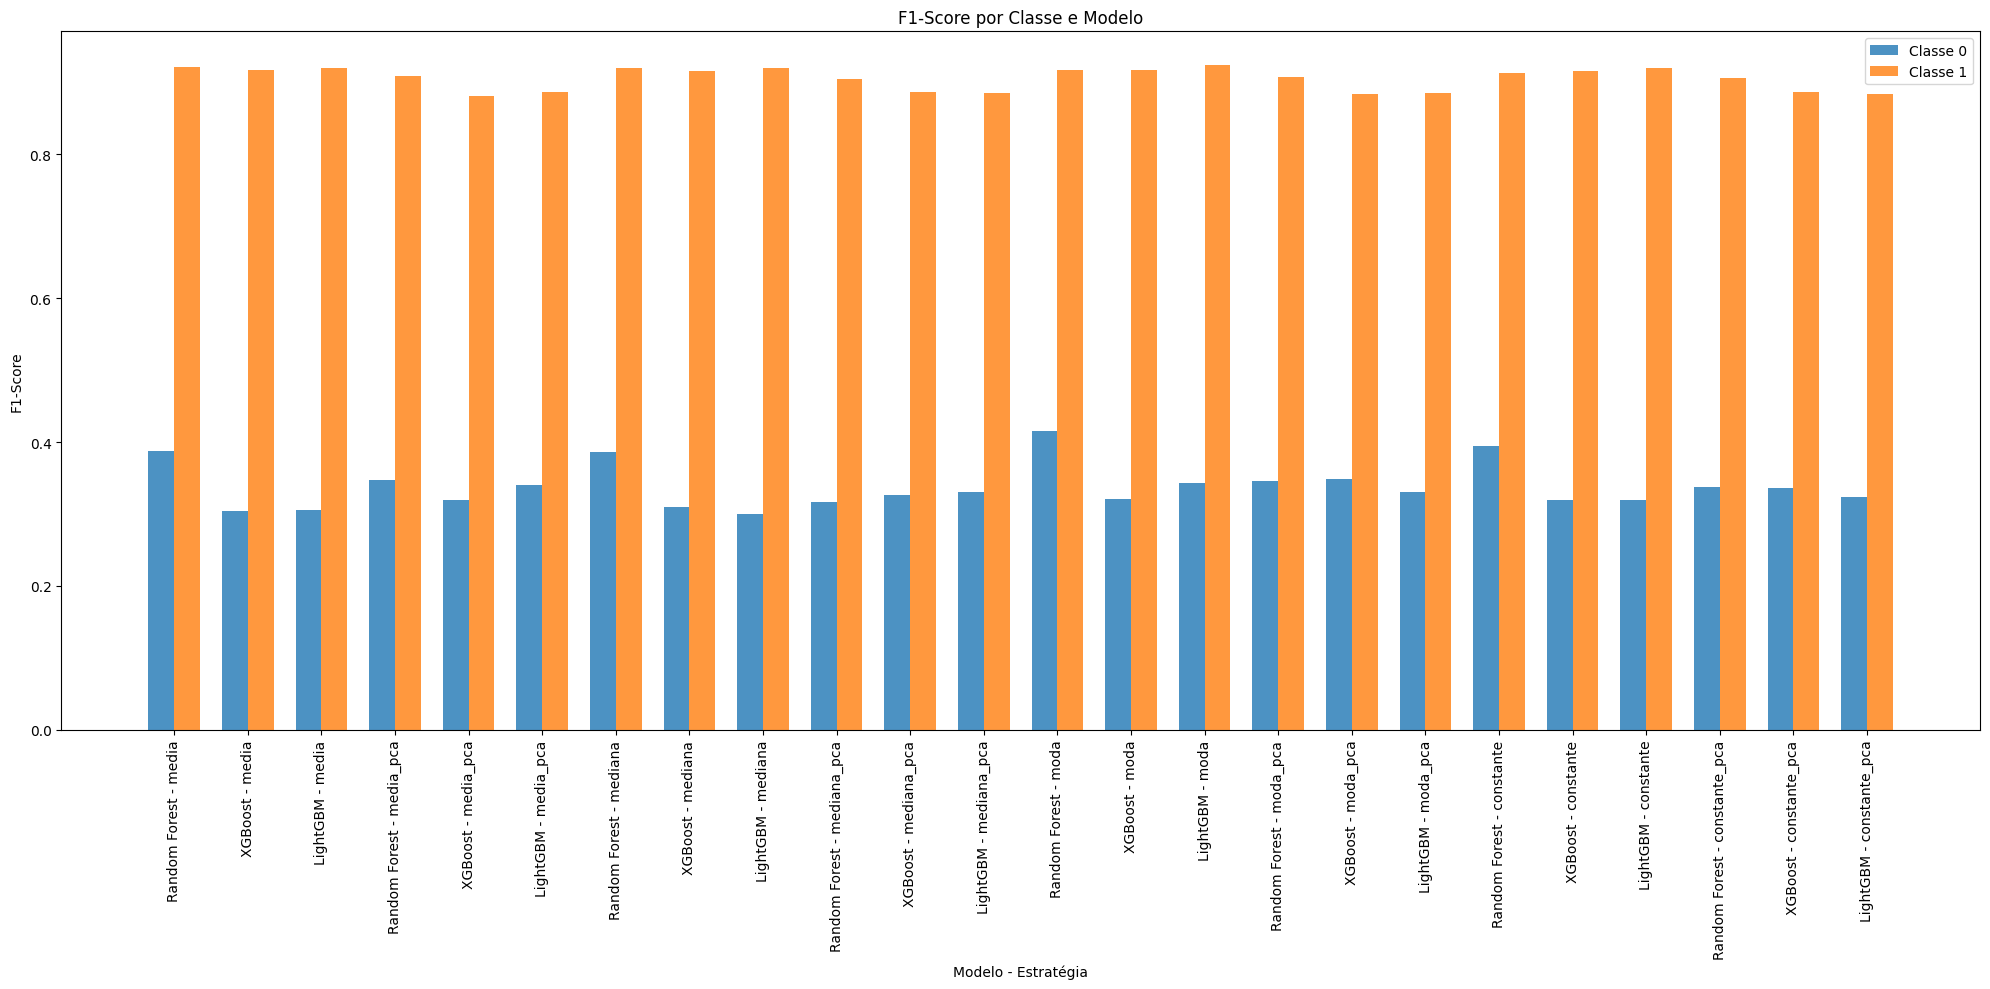

In [11]:
criar_grafico_barras_lado_a_lado(analise_modelos_df, 'F1-Score_Classe_0', 'F1-Score_Classe_1', 'F1-Score por Classe e Modelo', 'F1-Score')

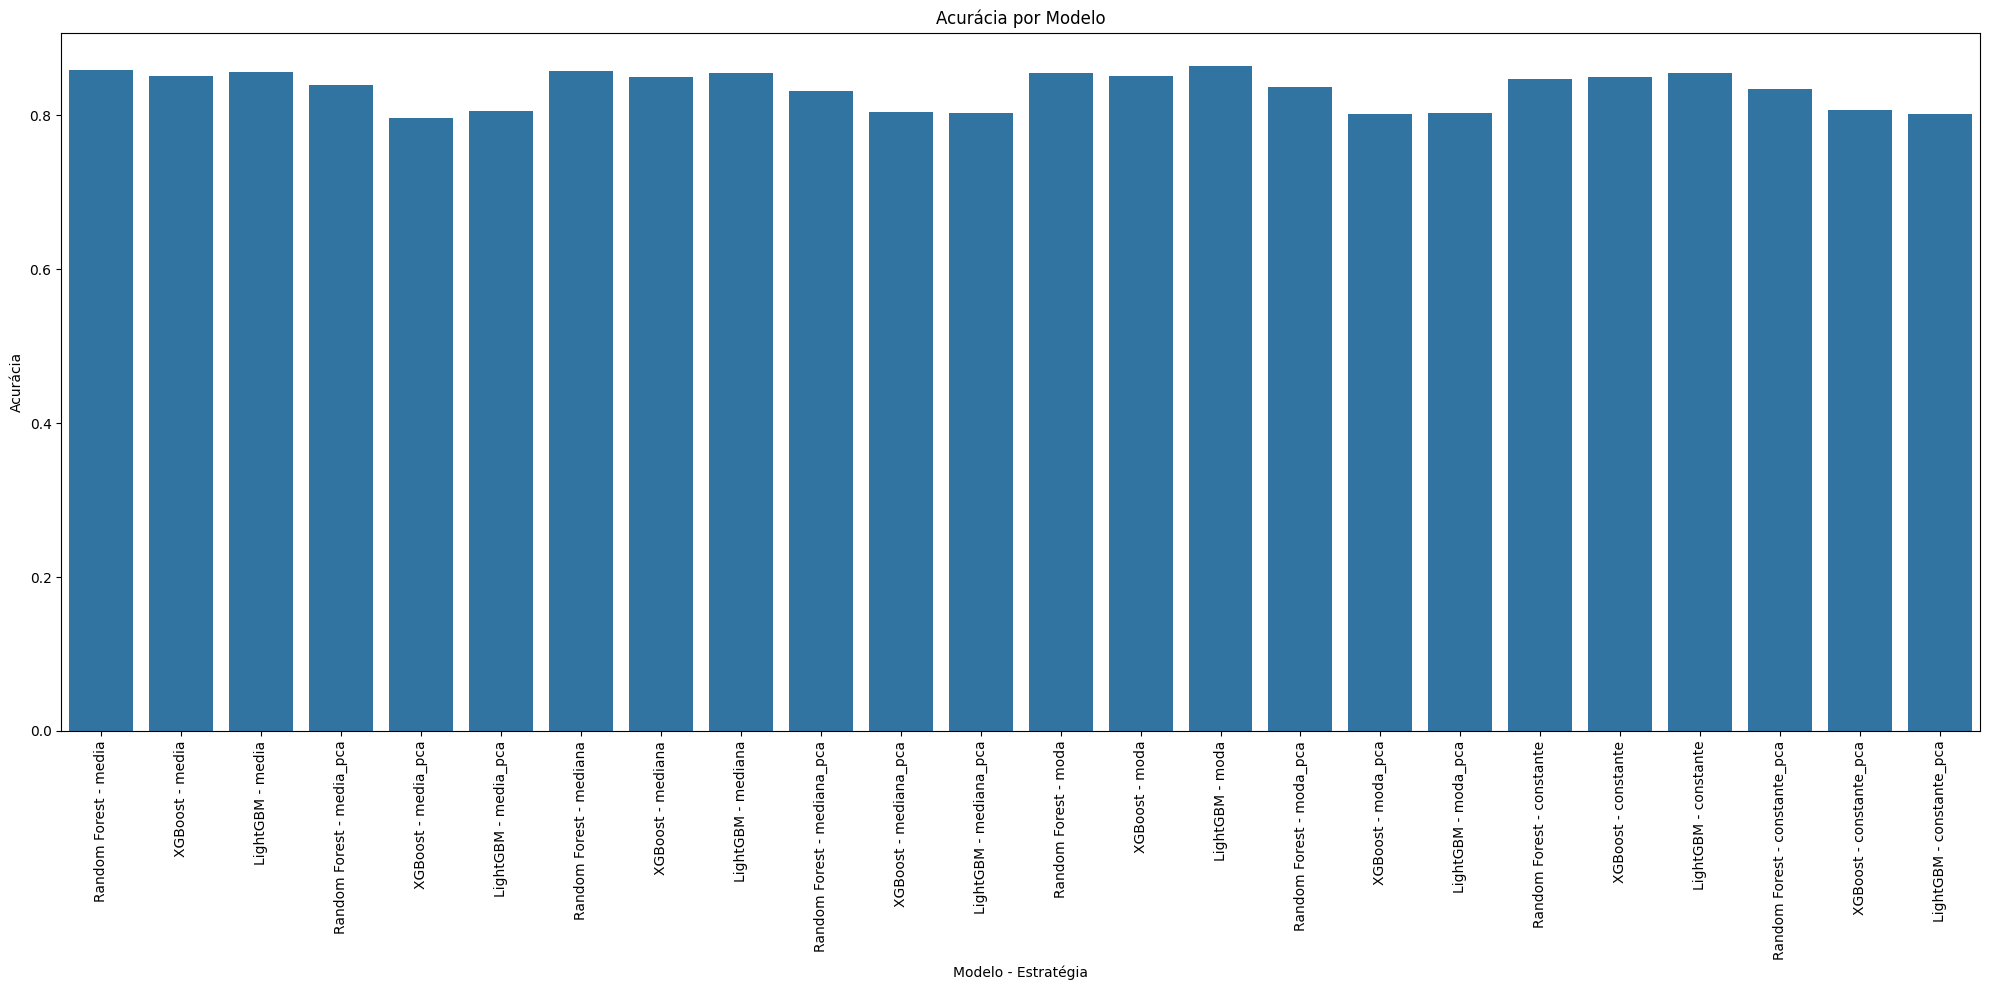

In [12]:
criar_grafico_barras(analise_modelos_df, 'Acurácia', 'Acurácia por Modelo', 'Acurácia')

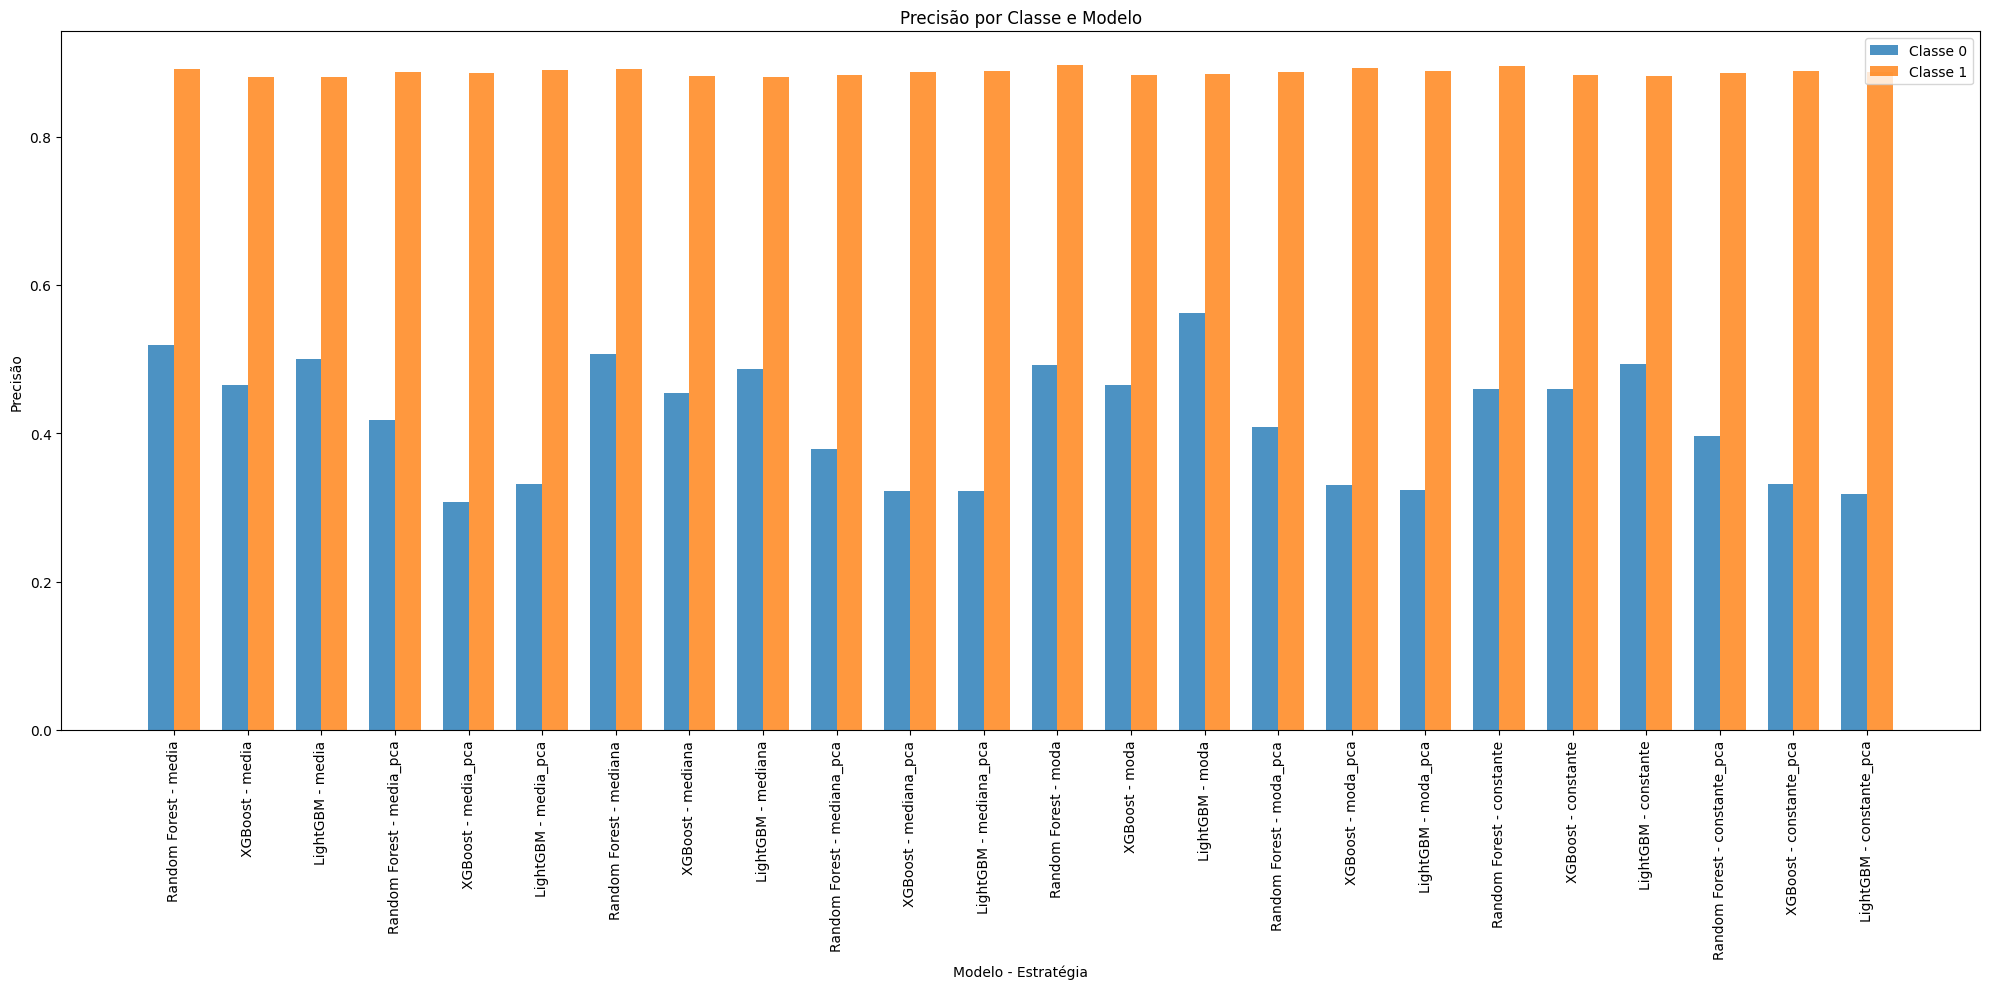

In [13]:
criar_grafico_barras_lado_a_lado(analise_modelos_df, 'Precisão_Classe_0', 'Precisão_Classe_1', 'Precisão por Classe e Modelo', 'Precisão')

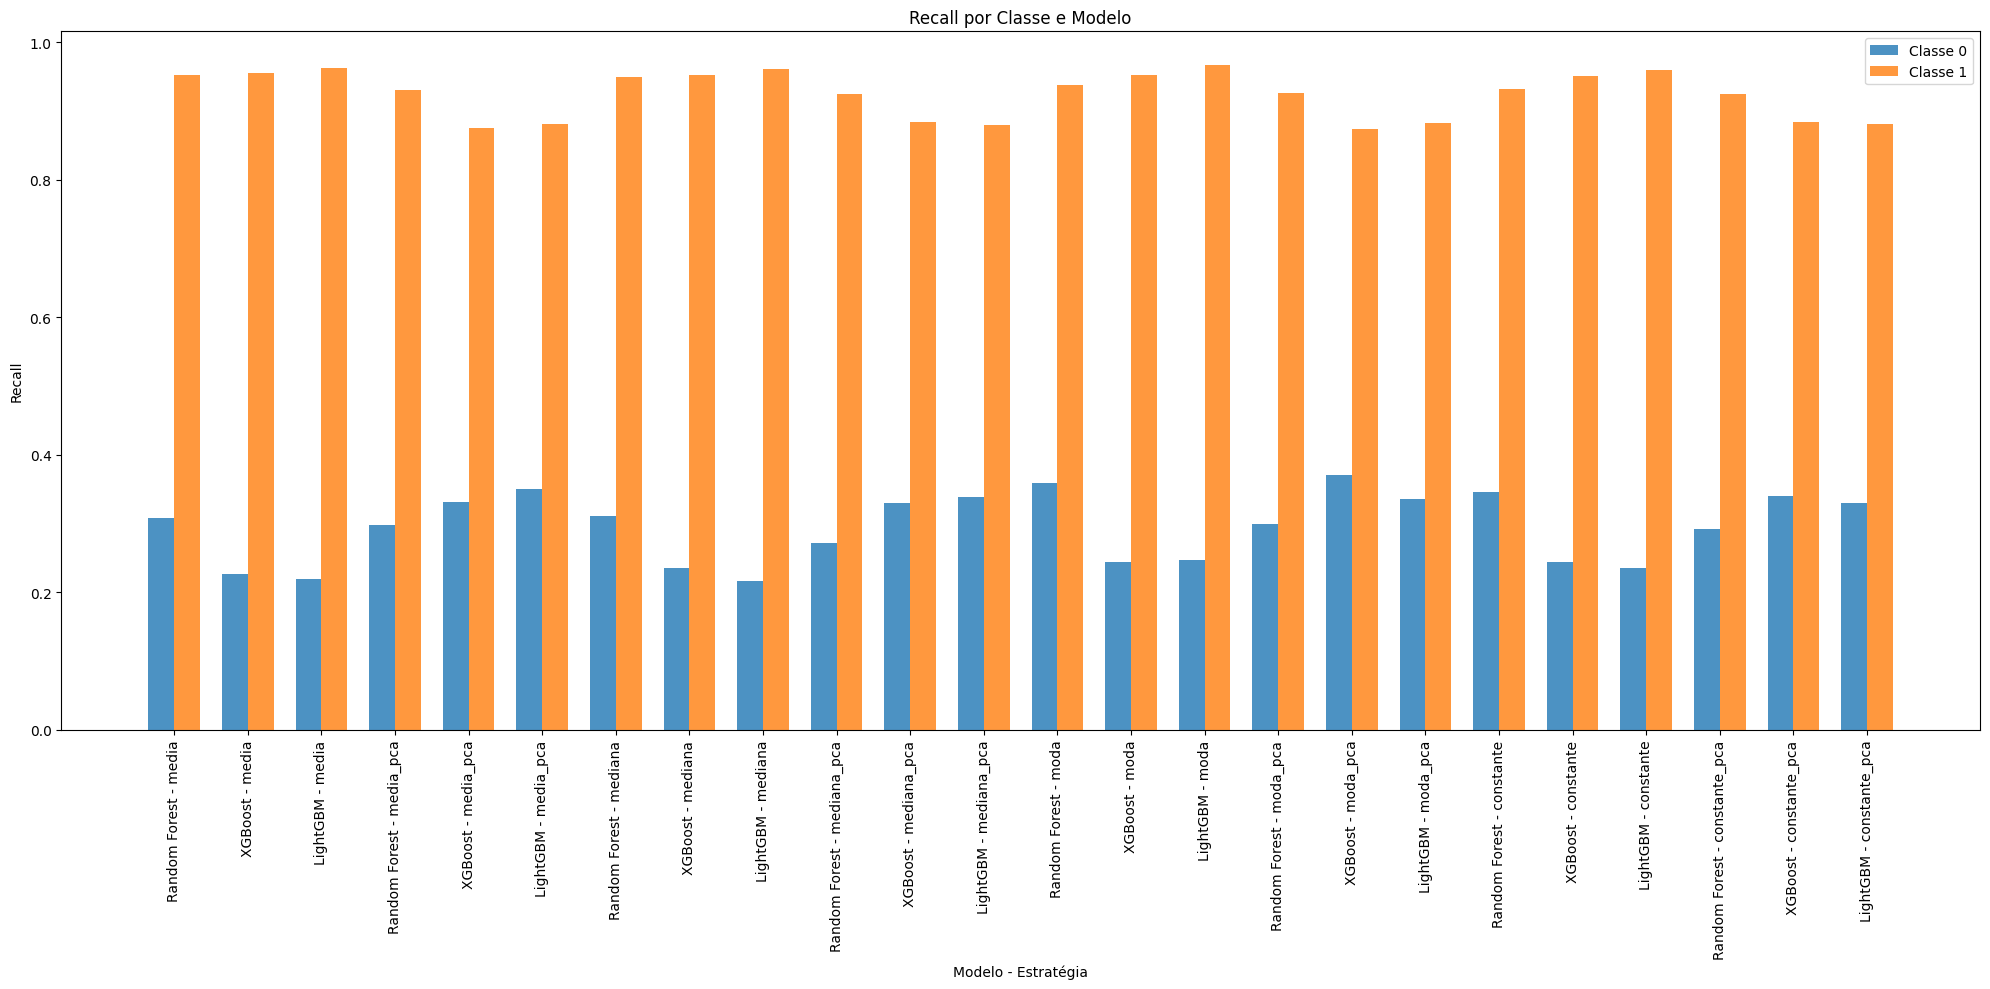

In [14]:
criar_grafico_barras_lado_a_lado(analise_modelos_df, 'Recall_Classe_0', 'Recall_Classe_1', 'Recall por Classe e Modelo', 'Recall')

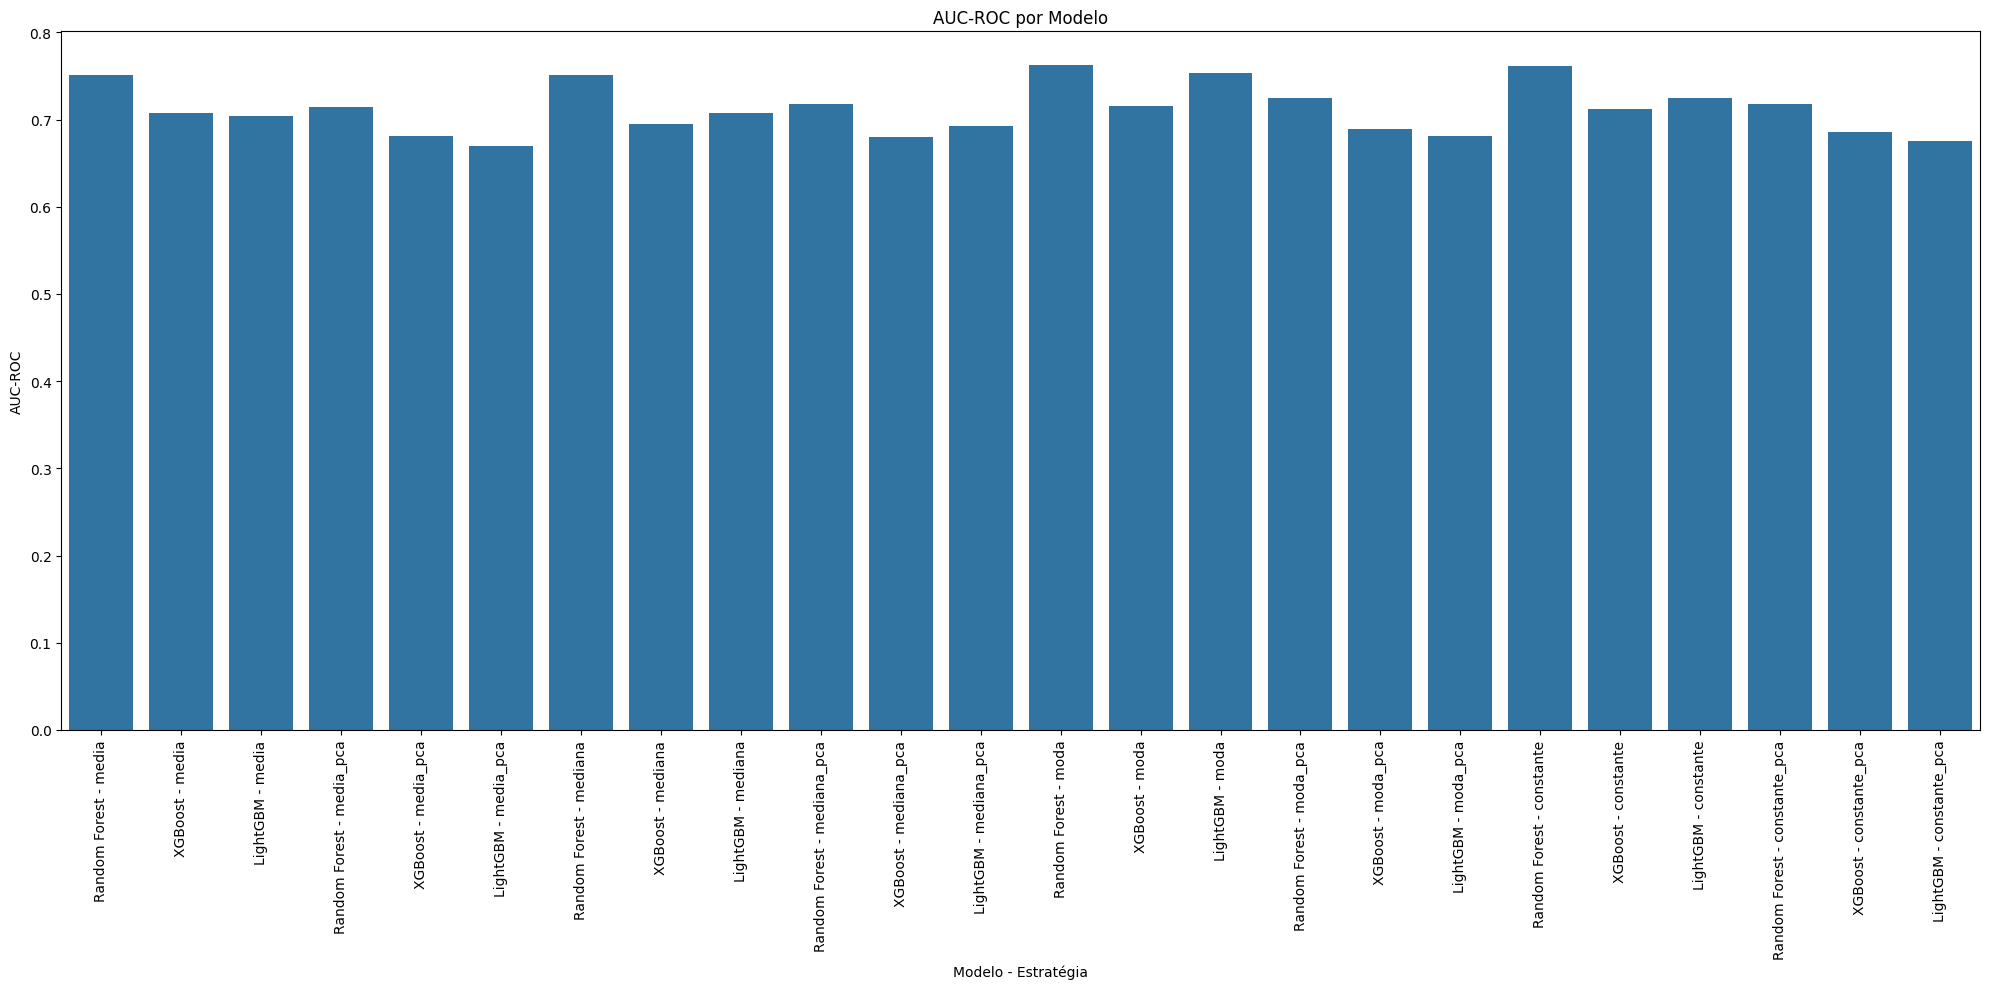

In [15]:
criar_grafico_barras(analise_modelos_df, 'AUC-ROC', 'AUC-ROC por Modelo', 'AUC-ROC')